In [ ]:
!git clone https://github.com/pvijay03/CSE151A-Project.git

Cloning into 'CSE151A-Project'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 20), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (46/46), 6.36 MiB | 9.01 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
#Milestone 1
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Milestone 1
pd.set_option('display.max_columns', None)
import seaborn as sns

In [ ]:
# Import dataset from Github

rawDataFrame = pd.read_csv('/content/CSE151A-Project/new_york_listings_2024.csv')

In [ ]:
print("Total Number of Observations (before filtering)")
print(rawDataFrame.size)

Total Number of Observations (before filtering)
456676


In [ ]:
print("Size of Dataset (rows by columns)")
print(rawDataFrame.shape)

# 22 different features

Size of Dataset (rows by columns)
(20758, 22)


In [ ]:
print("Summary Statistics for Numerical Features in Dataset:")
print(rawDataFrame.describe())

Summary Statistics for Numerical Features in Dataset:
                 id       host_id      latitude     longitude          price  \
count  2.075800e+04  2.075800e+04  20758.000000  20758.000000   20758.000000   
mean   3.034044e+17  1.749316e+08     40.726798    -73.939161     187.776616   
std    3.901216e+17  1.725541e+08      0.060294      0.061403    1022.797208   
min    2.595000e+03  1.678000e+03     40.500314    -74.249840      10.000000   
25%    2.708808e+07  2.041738e+07     40.684150    -73.980710      80.000000   
50%    4.993003e+07  1.087271e+08     40.722820    -73.949587     125.000000   
75%    7.216019e+17  3.144102e+08     40.763098    -73.917460     199.000000   
max    1.054376e+18  5.504035e+08     40.911147    -73.713650  100000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20758.000000       20758.000000       20758.000000   
mean        28.558435          42.642596           1.257910   
std         33.536518          73.56

In [ ]:
print("Frequency Counts for Unique Categorical Feature Values:")
for c in rawDataFrame.select_dtypes(include=["object"]).columns:
  print(c + ":")
  print(rawDataFrame[c].value_counts())
  print()

Frequency Counts for Unique Categorical Feature Values:
name:
Rental unit in New York · 1 bedroom · 1 bed · 1 bath                    409
Rental unit in New York · ★5.0 · 1 bedroom · 1 bed · 1 bath             235
Rental unit in Brooklyn · 1 bedroom · 1 bed · 1 bath                    201
Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1 bed · 1 bath             173
Rental unit in Brooklyn · 1 bedroom · 1 bed · 1 shared bath             158
                                                                       ... 
Rental unit in Brooklyn · ★4.52 · 1 bedroom · 3 beds · 1 bath             1
Rental unit in Brooklyn · ★4.83 · 2 bedrooms · 1 bed · 1 shared bath      1
Townhouse in Queens · ★4.33 · 2 bedrooms · 3 beds · 1 bath                1
Rental unit in New York · ★4.50 · 1 bedroom · 1 bed · 1 private bath      1
Rental unit in New York · ★4.46 · 1 bedroom · 2 beds · 1 bath             1
Name: name, Length: 9836, dtype: int64

host_name:
Jeniffer           184
Urban Furnished    176
Micha

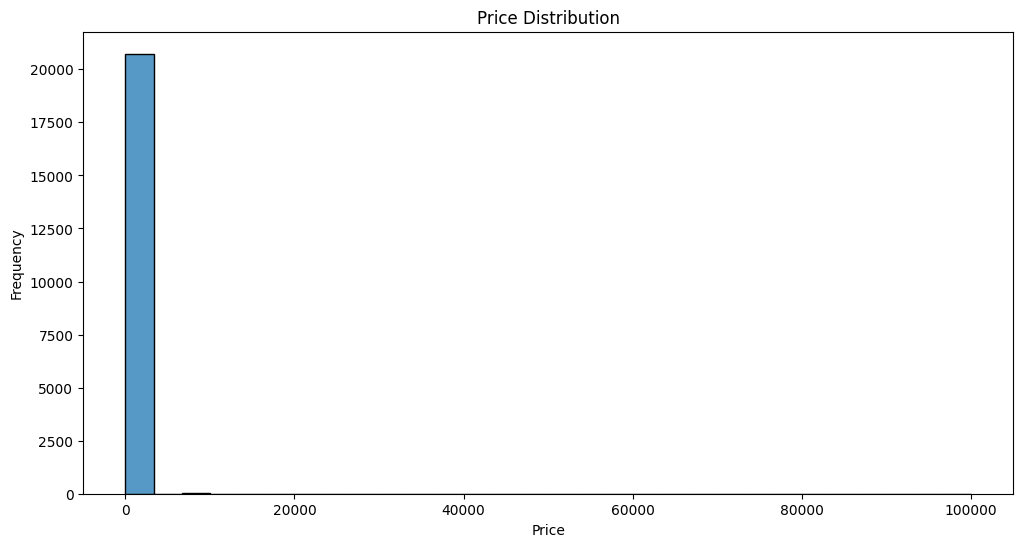

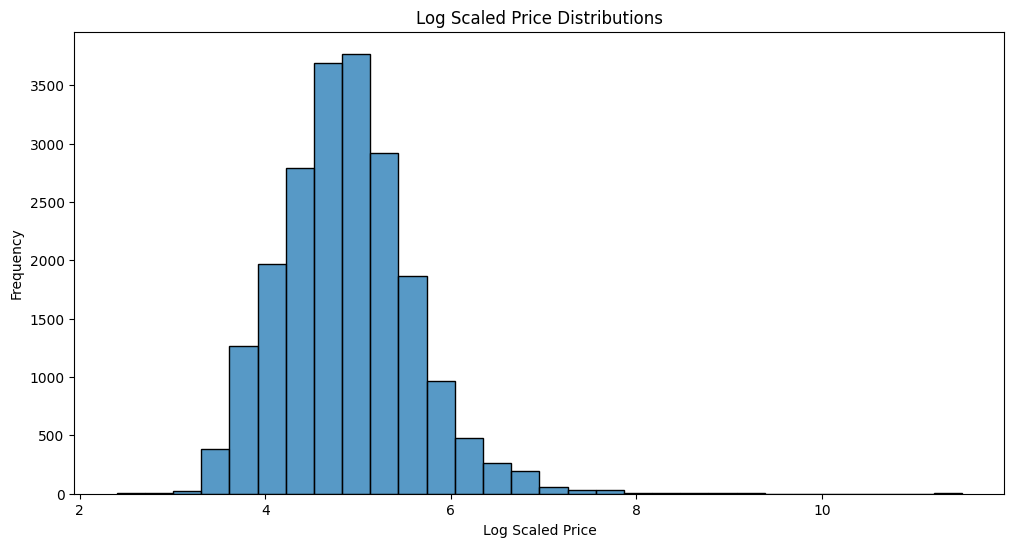

In [ ]:
# Price Distribution of Houses, as well as a log transformed version
# This provided a better spread of the data

plt.figure(figsize=(12,6))
sns.histplot(rawDataFrame['price'], bins=30)
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.show()

plt.figure(figsize=(12,6))
rawDataFrame['log_price'] = np.log1p(rawDataFrame['price'])
sns.histplot(rawDataFrame['log_price'], bins=30)
plt.title("Log Scaled Price Distributions")
plt.xlabel("Log Scaled Price")
plt.ylabel("Frequency")
plt.show()


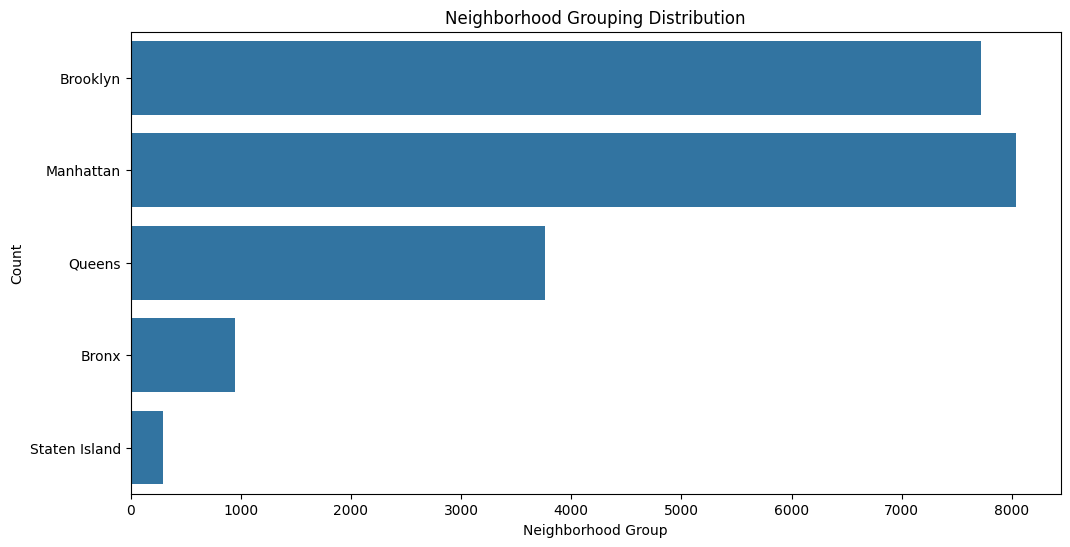

In [ ]:
# To start understanding geographical distribution, we plot the
# neighborhood grouping within New York boroughs

plt.figure(figsize=(12,6))
sns.countplot(rawDataFrame["neighbourhood_group"])
plt.title("Neighborhood Grouping Distribution")
plt.ylabel("Count")
plt.xlabel("Neighborhood Group")
plt.show()

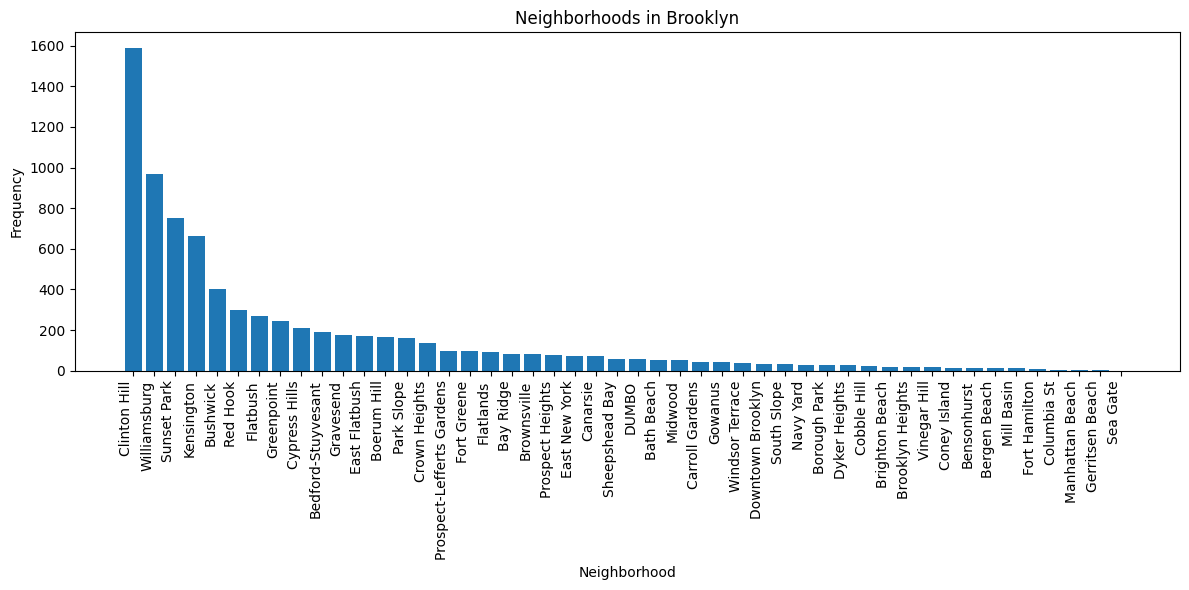

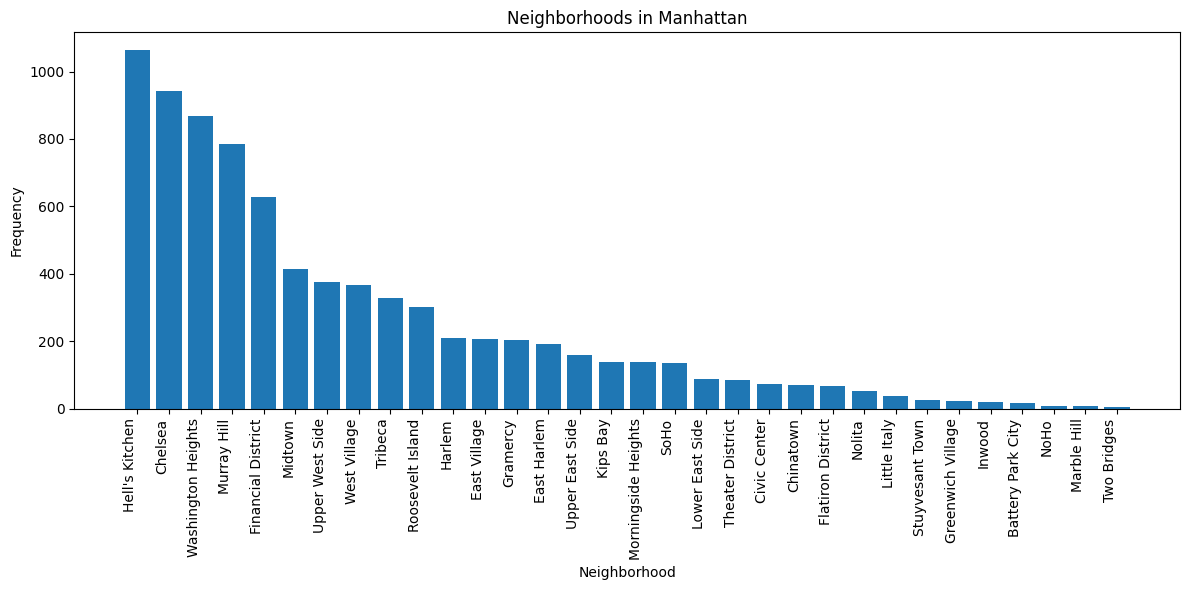

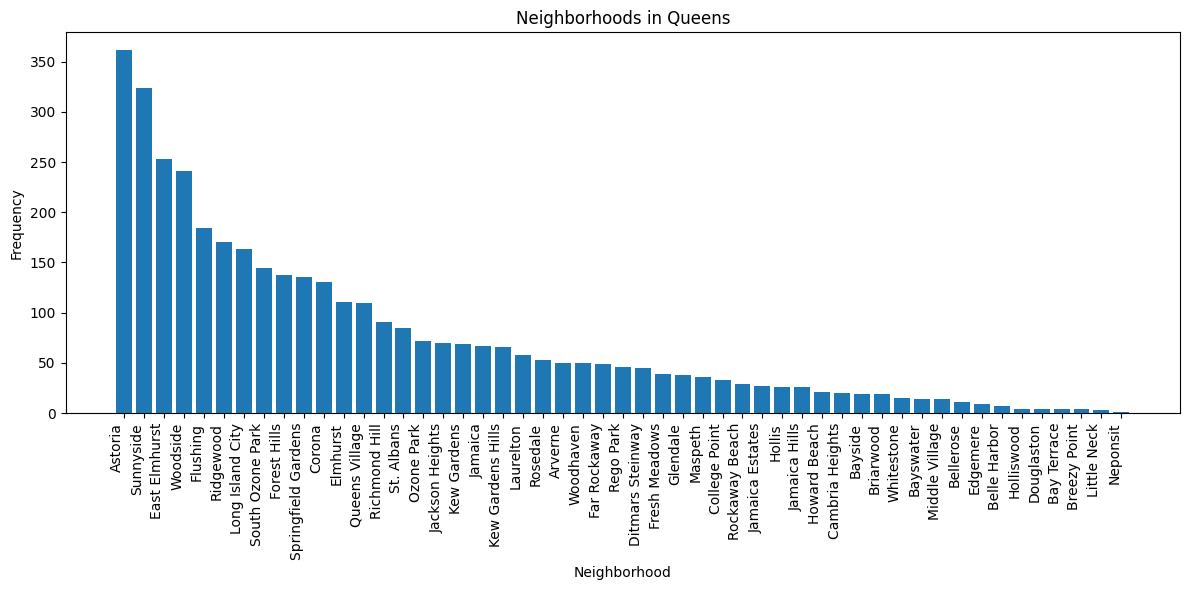

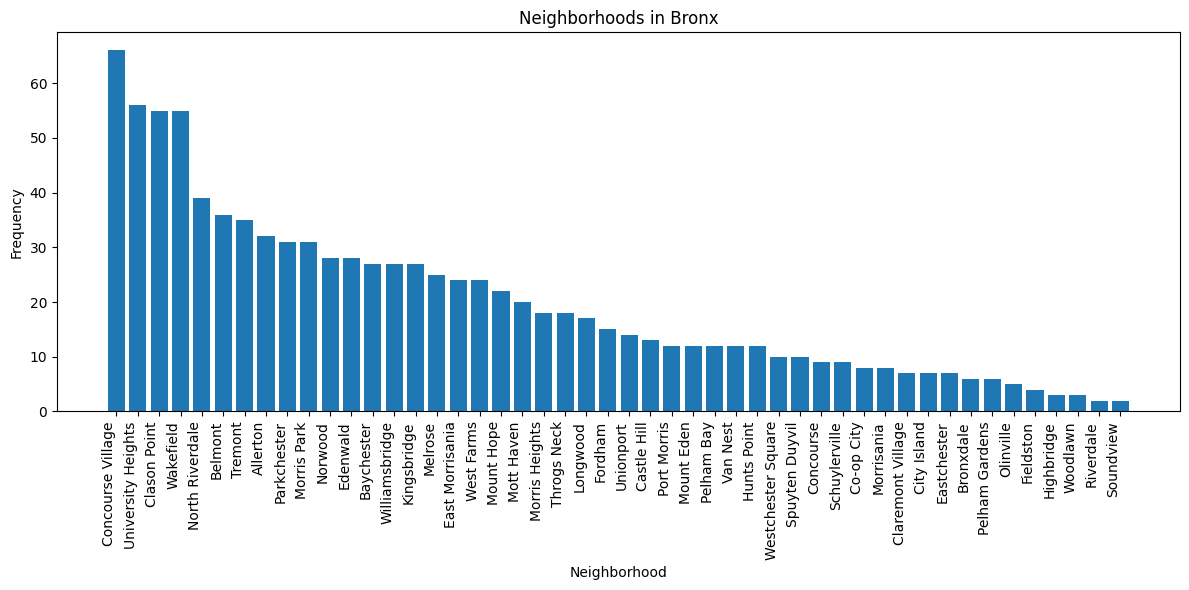

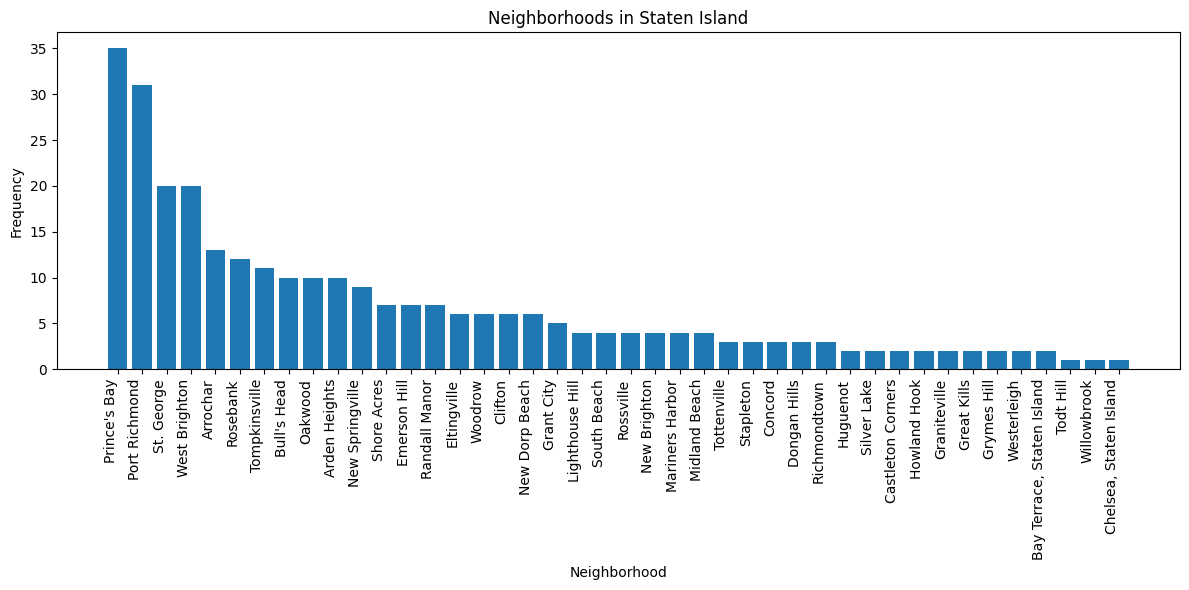

In [ ]:
# We further plotted the distributions within each borough, to find the most populous areas

unique_neighborhood_groups = rawDataFrame['neighbourhood_group'].unique()

for neighborhood_group in unique_neighborhood_groups:
    plt.figure(figsize=(12, 6))
    neighborhood_data = rawDataFrame[rawDataFrame['neighbourhood_group'] == neighborhood_group]
    unique_neighborhoods = neighborhood_data['neighbourhood'].unique()
    x_ticks = range(len(unique_neighborhoods))
    plt.bar(x_ticks, neighborhood_data['neighbourhood'].value_counts(), width=0.8)
    plt.title(f'Neighborhoods in {neighborhood_group}')
    plt.xlabel('Neighborhood')
    plt.ylabel('Frequency')
    plt.xticks(x_ticks, unique_neighborhoods, rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
#No directly null items but some items state that feature is "Not specified"

not_specified_counts = {}
for column in rawDataFrame.columns:
    not_specified_counts[column] = (rawDataFrame[column] == "Not specified").sum()

# Print the counts for these erroneous features

for column, count in not_specified_counts.items():
    print(f"Column '{column}': {count} rows with 'Not specified' rawDataFrame")

Column 'id': 0 rows with 'Not specified' rawDataFrame
Column 'name': 0 rows with 'Not specified' rawDataFrame
Column 'host_id': 0 rows with 'Not specified' rawDataFrame
Column 'host_name': 0 rows with 'Not specified' rawDataFrame
Column 'neighbourhood_group': 0 rows with 'Not specified' rawDataFrame
Column 'neighbourhood': 0 rows with 'Not specified' rawDataFrame
Column 'latitude': 0 rows with 'Not specified' rawDataFrame
Column 'longitude': 0 rows with 'Not specified' rawDataFrame
Column 'room_type': 0 rows with 'Not specified' rawDataFrame
Column 'price': 0 rows with 'Not specified' rawDataFrame
Column 'minimum_nights': 0 rows with 'Not specified' rawDataFrame
Column 'number_of_reviews': 0 rows with 'Not specified' rawDataFrame
Column 'last_review': 0 rows with 'Not specified' rawDataFrame
Column 'reviews_per_month': 0 rows with 'Not specified' rawDataFrame
Column 'calculated_host_listings_count': 0 rows with 'Not specified' rawDataFrame
Column 'availability_365': 0 rows with 'Not sp

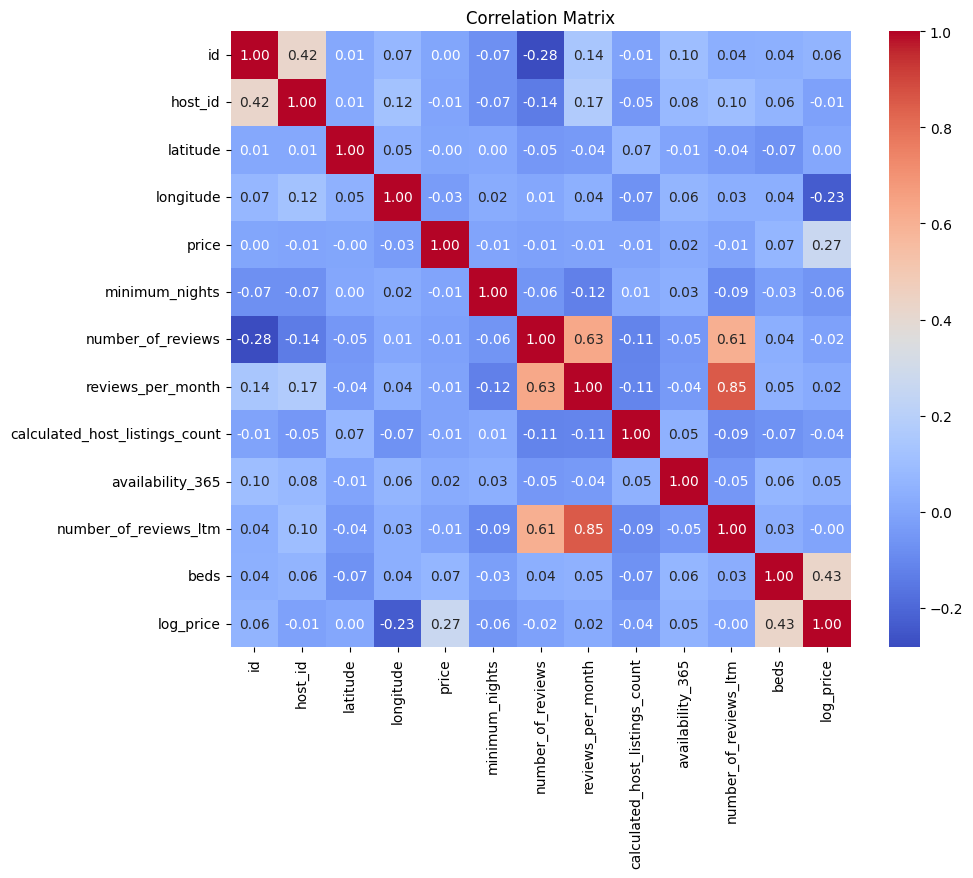

In [ ]:
numerical_data = rawDataFrame.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

KeyboardInterrupt: 

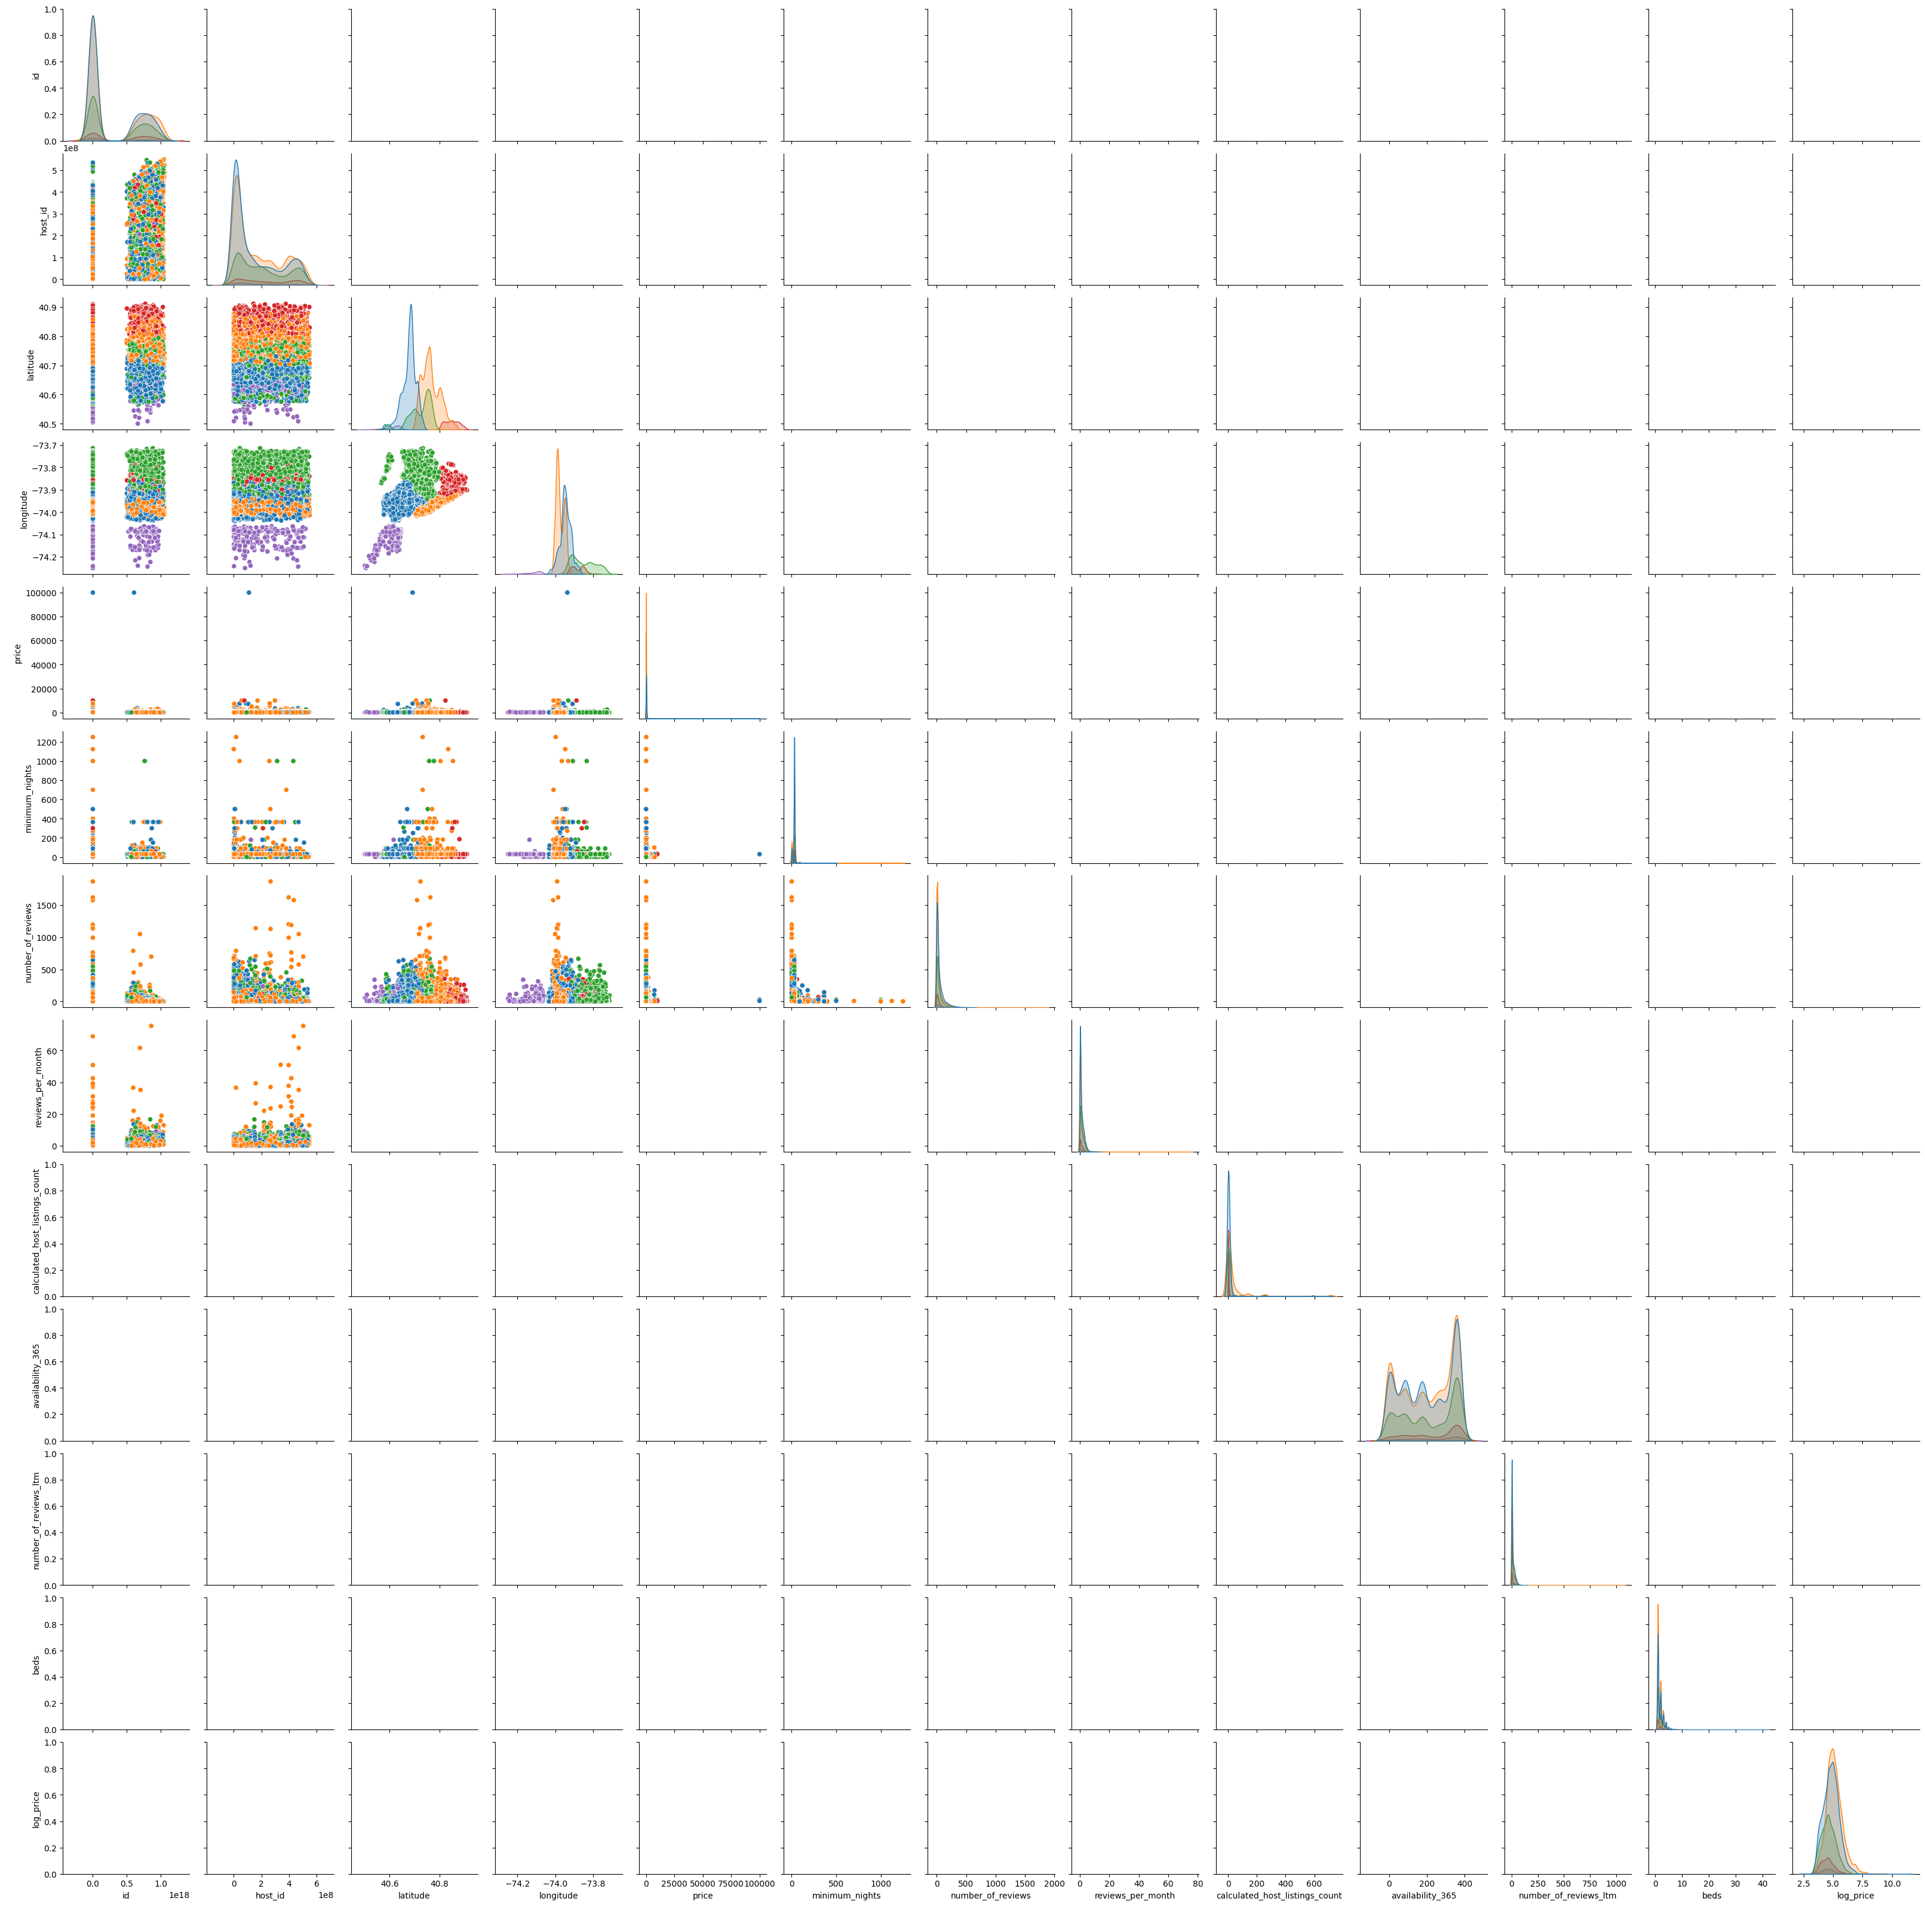

In [ ]:
sns.pairplot(rawDataFrame, hue='neighbourhood_group')
plt.show()
#Based on color separation it seems doable to develop a classification based model

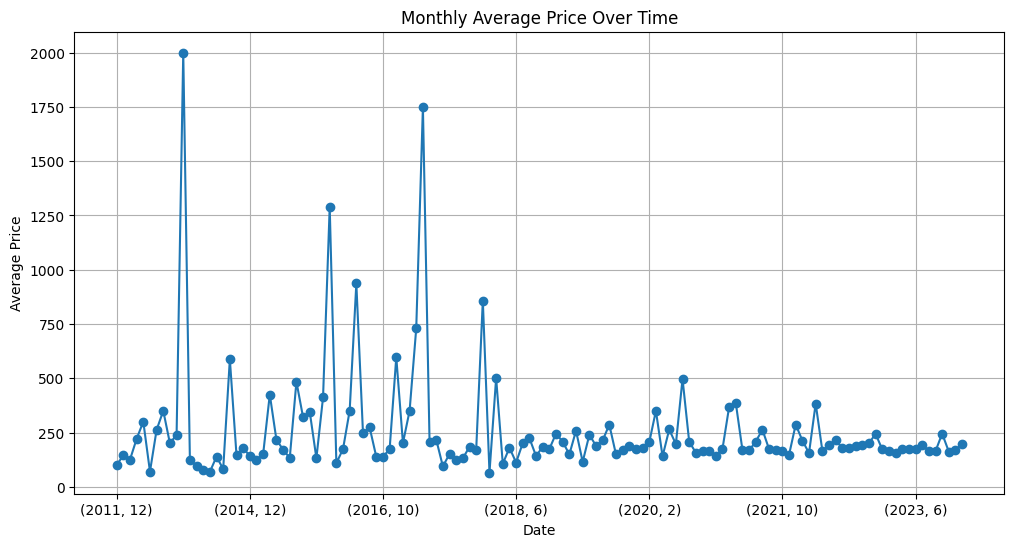

In [ ]:
rawDataFrame['last_review'] = pd.to_datetime(rawDataFrame['last_review'])


rawDataFrame['year'] = rawDataFrame['last_review'].dt.year
rawDataFrame['month'] = rawDataFrame['last_review'].dt.month


monthly_avg_price = rawDataFrame.groupby(['year', 'month'])['price'].mean()
plt.figure(figsize=(12, 6))
monthly_avg_price.plot(marker='o')
plt.title('Monthly Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
# Milestone 2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

cleanedDataFrame = rawDataFrame[rawDataFrame['rating'] != 'No rating']
cleanedDataFrame = cleanedDataFrame[cleanedDataFrame['rating'] != 'New ']

# Replace Studio in bedrooms column with 1
cleanedDataFrame['bedrooms'] = cleanedDataFrame['bedrooms'].replace('Studio', 1)

# Replace Not specified in baths column with 0
cleanedDataFrame['baths'] = cleanedDataFrame['baths'].replace('Not specified', 0)

# Separate target variable and features
X = cleanedDataFrame.drop(columns=['price'])
y = cleanedDataFrame['price']


# Set numerical and categorical features
numerical_cols = ['rating', 'bedrooms', 'beds', 'baths']

categorical_cols = ['neighbourhood_group', 'room_type']

In [ ]:

# Define the transformation pipelines

# Simple Imputer, Polynomial Feature Expansion, and Standard Scaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

# Simple Imputer and One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Apply the pipelines to the preprocessor and transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
X_transformed = preprocessor.fit_transform(X)

# Get new renamed column names after transformation
transformed_column_names = (
    list(preprocessor.named_transformers_['num']['poly'].get_feature_names_out(numerical_cols)) +
    list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))
)

# Create dataframe from X_transformed and new column names
X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_column_names)
X_transformed_df

,rating,bedrooms,beds,baths,rating^2,rating bedrooms,rating beds,rating baths,bedrooms^2,bedrooms beds,...,baths^2,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.902740,-0.503904,-0.607083,-2.462163,0.971042,-0.428553,-0.558662,-2.418178,-0.363413,-0.317793,...,-0.569724,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.218268,0.774537,-0.607083,-0.356319,-0.268342,0.728743,-0.614753,-0.378909,0.337476,-0.170579,...,-0.211979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.916763,-0.503904,0.202901,-0.356319,-1.985016,-0.649880,0.009043,-0.597246,-0.363413,-0.170579,...,-0.211979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.320177,-0.503904,-0.607083,-0.356319,-0.376818,-0.524550,-0.619852,-0.392009,-0.363413,-0.317793,...,-0.211979,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.597010,-0.503904,-0.607083,-0.356319,0.624639,-0.452553,-0.573960,-0.274107,-0.363413,-0.317793,...,-0.211979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17001,0.053492,-0.503904,-0.607083,-0.356319,0.024347,-0.495218,-0.601155,-0.343975,-0.363413,-0.317793,...,-0.211979,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17002,-0.931636,-0.503904,0.202901,-0.356319,-1.012998,-0.572549,0.107626,-0.470610,-0.363413,-0.170579,...,-0.211979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
17003,0.664950,-0.503904,-0.607083,-0.356319,0.701074,-0.447219,-0.570560,-0.265373,-0.363413,-0.317793,...,-0.211979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
17004,0.902740,-0.503904,-0.607083,-0.356319,0.971042,-0.428553,-0.558662,-0.234806,-0.363413,-0.317793,...,-0.211979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Milestone 3
# count = 0
# bin = 0
# starting = -1
# ending = 0
# y_np = y.to_numpy()
# y_np.sort()
# for i in y:
#   if starting == -1:
#     starting = i
#   count += 1
#   ending = i
#   if count == 1700:
#     print("if price >= ", starting, " and price < ", ending, ":")
#     print("\t return ", bin)
#     starting = -1
#     bin += 1
#     count = 0

def getBin(price):
  # if price <  55.0 :
	#   return  0
  if price <  74.0 :
    return  1
  # if price <  90.0 :
  #   return  2
  if price <  105.0 :
    return  3
  # if price <  125.0 :
  #   return  4
  if price <  150.0 :
    return  5
  # if price <  175.0 :
  #   return  6
  if price <  217.0 :
    return  7
  # if price <  300.0 :
  #   return  8
  return  9


In [ ]:
print(max(y))
print(min(y))
new_y = y.apply(getBin)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, new_y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

100000.0
10.0


(13604, 23)

(13604,)

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='tanh', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


339/341 [============================>.] - ETA: 0s - loss: 13.0714 - accuracy: 0.1980

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


341/341 [==============================] - 6s 10ms/step - loss: 13.0703 - accuracy: 0.1983 - val_loss: 12.7430 - val_accuracy: 0.1974
Epoch 2/10
341/341 [==============================] - 4s 12ms/step - loss: 13.2186 - accuracy: 0.1983 - val_loss: 13.9967 - val_accuracy: 0.1974
Epoch 3/10
341/341 [==============================] - 3s 10ms/step - loss: 14.9628 - accuracy: 0.1983 - val_loss: 15.9489 - val_accuracy: 0.1974
Epoch 4/10
341/341 [==============================] - 3s 10ms/step - loss: 17.3706 - accuracy: 0.1983 - val_loss: 18.7699 - val_accuracy: 0.1974
Epoch 5/10
341/341 [==============================] - 4s 11ms/step - loss: 20.8199 - accuracy: 0.1983 - val_loss: 22.1185 - val_accuracy: 0.1974
Epoch 6/10
341/341 [==============================] - 4s 11ms/step - loss: 23.5908 - accuracy: 0.1983 - val_loss: 24.9766 - val_accuracy: 0.1974
Epoch 7/10
341/341 [==============================] - 3s 10ms/step - loss: 26.2594 - accuracy: 0.1983 - val_loss: 27.5807 - val_accuracy: 0.1

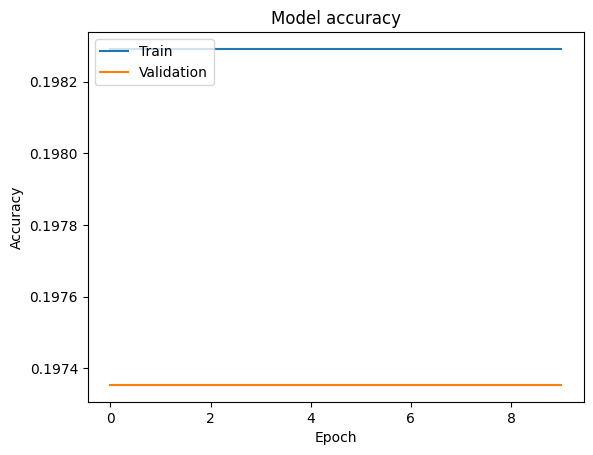

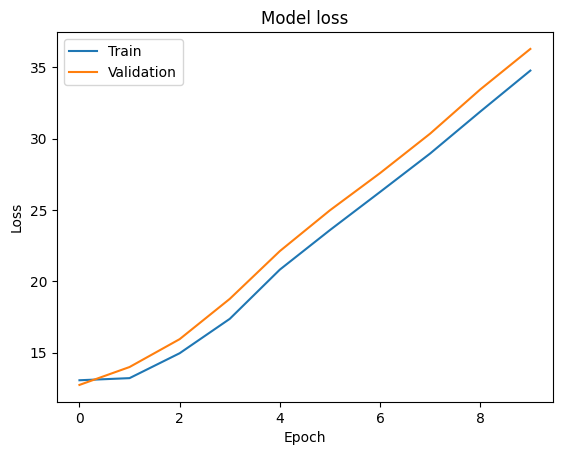

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
# Milestone 4
from keras.callbacks import History
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.utils import to_categorical

one_hot_encoded_train = pd.get_dummies(y_train)

one_hot_encoded_test = pd.get_dummies(y_test)

def build_model(hp):
  model = Sequential([
      Dense(units=hp.Int('units_1', min_value=0, max_value=1024, step=1), activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid']), input_shape=(X_train.shape[1],)),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=hp.Int('units_2', min_value=0, max_value=512, step=1), activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=hp.Int('units_3', min_value=0, max_value=256, step=1), activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=hp.Int('units_4', min_value=0, max_value=64, step=1), activation=hp.Choice('activation_4', values=['relu', 'tanh', 'sigmoid'])),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_4', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=one_hot_encoded_train.shape[1], activation=hp.Choice('activation_5', values=['softmax', 'relu', 'tanh', 'sigmoid']))
  ])
  # Choice of loss function and learning rate
  loss_function = hp.Choice('loss', values=['mean_squared_error', 'binary_crossentropy', 'categorical_crossentropy'])
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  # Compile the model
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=loss_function,
                metrics=['accuracy'])
  return model

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="hw2",
    project_name="hyperparamter_tuning_results"
)

# Search
tuner.search(X_train, one_hot_encoded_train, epochs=50, validation_data=(X_test, one_hot_encoded_test), verbose=0)

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Print the set of optimal hyperparameters
print("Optimal Hyperparameters:")
print(best_hyperparameters.values)

# Initialize model
best_model = Sequential([
      Dense(units=best_hyperparameters.get('units_1'), activation=best_hyperparameters.get('activation_1'), input_shape=(X_train.shape[1],)),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_1')),
      Dense(units=best_hyperparameters.get('units_2'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_3')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_3')),
      Dense(units=best_hyperparameters.get('units_4'), activation=best_hyperparameters.get('activation_4')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_4')),
      Dense(units=one_hot_encoded_train.shape[1], activation=best_hyperparameters.get('activation_5'))
    ])

# Compile and train model
best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hyperparameters.get('lr')),
                  loss=best_hyperparameters.get('loss'),
                  metrics=['accuracy'])
history = best_model.fit(X_train, one_hot_encoded_train, epochs=50, validation_data=(X_test, one_hot_encoded_test), verbose=0)

# Calculate loss and accuracy
loss, accuracy = best_model.evaluate(X_test, one_hot_encoded_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/50
426/426 [==============================] - 11s 12ms/step - loss: 0.1615 - accuracy: 0.3618 - val_loss: 0.1382 - val_accuracy: 0.4051
Epoch 2/50
426/426 [==============================] - 4s 10ms/step - loss: 0.1423 - accuracy: 0.3950 - val_loss: 0.1386 - val_accuracy: 0.4115
Epoch 3/50
426/426 [==============================] - 7s 17ms/step - loss: 0.1410 - accuracy: 0.3978 - val_loss: 0.1374 - val_accuracy: 0.4200
Epoch 4/50
426/426 [==============================] - 9s 21ms/step - loss: 0.1407 - accuracy: 0.3961 - val_loss: 0.1375 - val_accuracy: 0.4115
Epoch 5/50
426/426 [==============================] - 5s 11ms/step - loss: 0.1402 - accuracy: 0.4018 - val_loss: 0.1375 - val_accuracy: 0.4186
Epoch 6/50
426/426 [==============================] - 5s 12ms/step - loss: 0.1402 - accuracy: 0.4015 - val_loss: 0.1370 - val_accuracy: 0.4148
Epoch 7/50
426/426 [==============================] - 4s 10ms/step - loss: 0.1402 - accuracy: 0.4036 - val_loss: 0.1375 - val_accuracy: 0.412

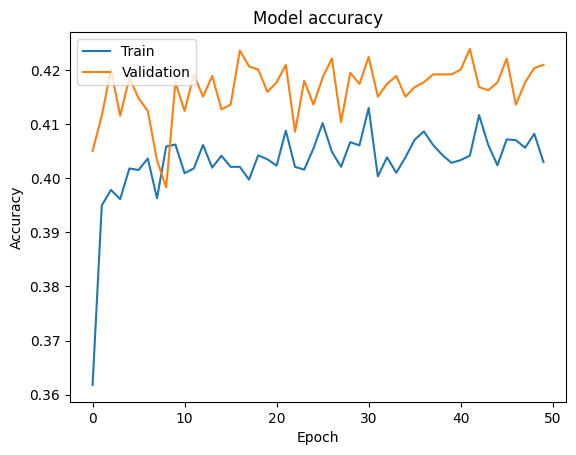

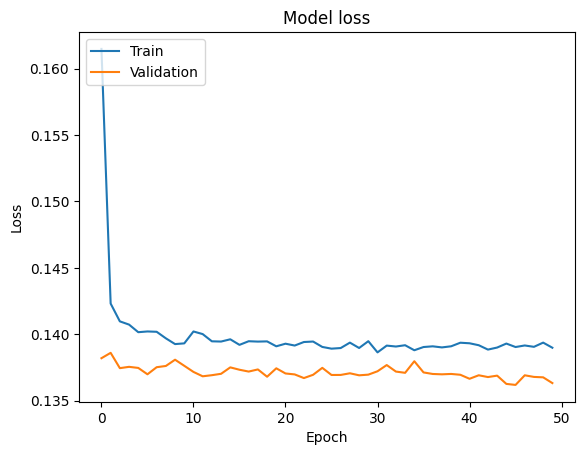

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()